This notebook is for creating animations and timeseries with the ABI data

In [1]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from pyproj import Proj
from datetime import datetime
import imageio as img
import os

In [16]:
#Constants
source = '/localdata/cases/20190403/ABI/CTPC/'
save_location = '/localdata/cases/20190403/ABI/CTPC_pics/'

nw_lat=36.40
nw_lon=-102.24
se_lat=34.10
se_lon=-96.80

In [17]:
def cutup(nc_file,var,nw_lat,nw_lon,se_lat,se_lon):
    #Getting the Satellite info
    sat_h = nc_file.variables['goes_imager_projection'].perspective_point_height
    sat_lon = nc_file.variables['goes_imager_projection'].longitude_of_projection_origin
    sat_sweep = nc_file.variables['goes_imager_projection'].sweep_angle_axis
    
    #Creating the projection conversion
    p = Proj(proj='geos', h=sat_h, lon_0=sat_lon, sweep=sat_sweep)
    
    #Getting the XY datapoints setup
    X = nc_file.variables['x'][:] * sat_h
    Y = nc_file.variables['y'][:] * sat_h
    XX, YY = np.meshgrid(X, Y)
    
    #Conversion to lat/lon
    lons, lats = p(XX, YY, inverse=True)
    
    #Cutting doing the variable
    locations = (lons<se_lon) &  (lons>nw_lon) & (lats<nw_lat) & (lats>se_lat)
    cut_var = var[locations]
    
    return cut_var

#cut_var = cutup(ABI,var,nw_lat,nw_lon,se_lat,se_lon)

In [20]:
#Reading in files to create a timeseries
var_max = np.empty(0)
var_min = np.empty(0)
time = np.empty(0)
for i in os.listdir(source):
    ABI = nc.Dataset(source+i, 'r')
    var = ABI.variables['PRES'][:,:]
    var_max = np.append(var_max, np.max(var))
    var_min = np.append(var_min, np.min(var))
    
    time_string = ABI.time_coverage_end
    time = np.append(time, datetime.strptime(time_string, '%Y-%m-%dT%H:%M:%S.%fZ'))
    

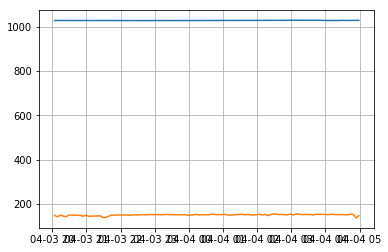

1029.3975830078125
137.5294189453125


In [21]:
#Quick Readout
plt.plot(time,var_max)
plt.plot(time,var_min)
plt.grid(True)
plt.show()
print (np.max(var_max))
print (np.min(var_min))

In [19]:
ABI

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    naming_authority: gov.nesdis.noaa
    Conventions: CF-1.7
    Metadata_Conventions: Unidata Dataset Discovery v1.0
    standard_name_vocabulary: CF Standard Name Table (v35, 20 July 2016)
    institution: DOC/NOAA/NESDIS > U.S. Department of Commerce, National Oceanic and Atmospheric Administration, National Environmental Satellite, Data, and Information Services
    project: GOES
    production_site: NSOF
    production_environment: OE
    spatial_resolution: 10km at nadir
    orbital_slot: GOES-East
    platform_ID: G16
    instrument_type: GOES R Series Advanced Baseline Imager
    scene_id: CONUS
    instrument_ID: FM1
    dataset_name: OR_ABI-L2-CTPC-M6_G16_s20190932001196_e20190932003568_c20190932005207.nc
    iso_series_metadata_id: aa36b140-b00d-11e1-afa6-0800200c9a66
    title: ABI L2 Cloud Top Pressure
    summary: The Cloud Top Pressure product consists of the pressure at the top of clo

In [22]:
bounds = np.arange(100,1100,50)

In [23]:
for i in sorted(os.listdir(source)):
    ABI = nc.Dataset(source+i, 'r')
    var = ABI.variables['PRES'][:,:]
    x = ABI.variables['x'][:]
    y = ABI.variables['y'][:]
    time_string = ABI.time_coverage_end
    time = datetime.strptime(time_string, '%Y-%m-%dT%H:%M:%S.%fZ')
    YYYY = time.strftime('%Y')
    mm = time.strftime('%m') #month
    DD = time.strftime('%D')
    dd = time.strftime('%d')
    HH = time.strftime('%H')
    MM = time.strftime('%M') #Minute
    
    plt.figure(figsize=(14, 6))
    ax = plt.axes(projection=ccrs.Geostationary(-75, 35786023.0))

    plt.contourf(x*35786023.0,y*35786023.0,var,cmap=plt.get_cmap('gnuplot2'),alpha=0.8,levels=bounds)
    ax.set_extent([nw_lon, se_lon, se_lat, nw_lat])
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.STATES, zorder=9)
    cbar = plt.colorbar()
    
    cbar.set_label('Cloud Top Pressure')
    plt.title('ABI Cloud Top Pressures (CTP) ',loc='left')
    plt.title(DD+'  '+HH+':'+MM, loc='right')
    plt.savefig(save_location+YYYY+mm+dd+HH+MM)
    plt.close()
    print (HH+MM)

2003
2008
2013
2018
2023
2028
2033
2038
2043
2048
2053
2058
2103
2108
2113
2118
2123
2128
2133
2138
2143
2148
2153
2158
2203
2208
2213
2218
2223
2228
2233
2238
2243
2248
2253
2258
2303
2308
2313
2318
2323
2328
2333
2338
2343
2348
2353
2358
0003
0008
0013
0018
0023
0028
0033
0038
0043
0048
0053
0058
0103
0108
0113
0118
0123
0128
0133
0138
0143
0148
0153
0158
0203
0208
0213
0218
0223
0228
0233
0238
0243
0248
0253
0258
0303
0308
0313
0318
0323
0328
0333
0338
0343
0348
0353
0358
0403
0408
0413
0418
0423
0428
0433
0438
0443
0448
0453
0458


In [24]:
pics = []
for i in sorted(os.listdir(save_location)):
    pics.append(img.imread(save_location+i))

img.mimsave(save_location+'animation.gif', pics , format='gif', loop=0, duration=0.1, subrectangles=True)